In [194]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
spark = SparkSession.builder.appName("OPI_Analytics_Pueba_SecB").getOrCreate()

In [3]:
!pwd

/home/jovyan/work


In [4]:
CSV_LOCATION = "/home/jovyan/work/all_data.csv"

In [6]:
df = spark.read.csv(CSV_LOCATION)

In [7]:
df.show()

+--------------------+--------------------+--------------------+--------------------+-----------------+------+--------------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|                 _c0|                 _c1|                 _c2|                 _c3|              _c4|   _c5|                 _c6|               _c7|                 _c8|                 _c9|                _c10|            _c11|                _c12|    _c13|      _c14|
+--------------------+--------------------+--------------------+--------------------+-----------------+------+--------------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|            producto|        presentacion|               marca|           categoria|         catalogo|precio|       fechaRegistro|   cadenaComercial|                giro|     nombreCo

In [9]:
# Loading CSV file with proper parsing and inferSchema
df = spark.read.csv(
    path=CSV_LOCATION,
    sep=",",
    header=True,
    quote='"',
    encoding="UTF-8",
    inferSchema=True,
)

# Displaying results of the load
df.show()
# df.printSchema()

+--------------------+--------------------+--------------------+--------------------+-----------------+------+-------------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|            producto|        presentacion|               marca|           categoria|         catalogo|precio|      fechaRegistro|   cadenaComercial|                giro|     nombreComercial|           direccion|          estado|           municipio| latitud|  longitud|
+--------------------+--------------------+--------------------+--------------------+-----------------+------+-------------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|CUADERNO FORMA IT...|96 HOJAS PASTA DU...|            ESTRELLA|    MATERIAL ESCOLAR| UTILES ESCOLARES|  25.9|2011-05-18 00:00:00|ABASTECEDORA LUMEN|          PAPELERIAS|ABASTECEDORA LUME

In [12]:
df[['producto','presentacion', 'marca', 'categoria', 'catalogo', 'precio', 'fechaRegistro', 'cadenaComercial']].show()

+--------------------+--------------------+--------------------+--------------------+-----------------+------+-------------------+------------------+
|            producto|        presentacion|               marca|           categoria|         catalogo|precio|      fechaRegistro|   cadenaComercial|
+--------------------+--------------------+--------------------+--------------------+-----------------+------+-------------------+------------------+
|CUADERNO FORMA IT...|96 HOJAS PASTA DU...|            ESTRELLA|    MATERIAL ESCOLAR| UTILES ESCOLARES|  25.9|2011-05-18 00:00:00|ABASTECEDORA LUMEN|
|            CRAYONES|CAJA 12 CERAS. JU...|             CRAYOLA|    MATERIAL ESCOLAR| UTILES ESCOLARES|  27.5|2011-05-18 00:00:00|ABASTECEDORA LUMEN|
|            CRAYONES|CAJA 12 CERAS. TA...|             CRAYOLA|    MATERIAL ESCOLAR| UTILES ESCOLARES|  13.9|2011-05-18 00:00:00|ABASTECEDORA LUMEN|
|   COLORES DE MADERA|CAJA 12 PIEZAS LA...|            PINCELIN|    MATERIAL ESCOLAR| UTILES ESCOLAR

In [14]:
df[['producto','presentacion', 'marca', 'categoria', 'catalogo', 'precio', 'fechaRegistro', 'cadenaComercial']].printSchema()

root
 |-- producto: string (nullable = true)
 |-- presentacion: string (nullable = true)
 |-- marca: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- catalogo: string (nullable = true)
 |-- precio: double (nullable = true)
 |-- fechaRegistro: timestamp (nullable = true)
 |-- cadenaComercial: string (nullable = true)



In [13]:
df[['giro','nombreComercial', 'direccion', 'estado', 'municipio', 'latitud', 'longitud']].show()

+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|                giro|     nombreComercial|           direccion|          estado|           municipio| latitud|  longitud|
+--------------------+--------------------+--------------------+----------------+--------------------+--------+----------+
|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.125417|
|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.125417|
|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.125417|
|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.125417|
|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.125417|
|          PAPEL

In [15]:
df[['giro','nombreComercial', 'direccion', 'estado', 'municipio', 'latitud', 'longitud']].printSchema()

root
 |-- giro: string (nullable = true)
 |-- nombreComercial: string (nullable = true)
 |-- direccion: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- latitud: string (nullable = true)
 |-- longitud: string (nullable = true)



In [17]:
df[['producto','presentacion', 'marca', 'categoria', 'catalogo', 'precio', 'fechaRegistro', 'cadenaComercial']].describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+----------------+------------------+----------------+
|summary|            producto|        presentacion|               marca|           categoria|        catalogo|            precio| cadenaComercial|
+-------+--------------------+--------------------+--------------------+--------------------+----------------+------------------+----------------+
|  count|            62530695|            62530695|            62530695|            61643357|        62530467|          62530695|        62529511|
|   mean|                null|   77442.23093432537|              1880.0|                null|            null| 516.5699223651386|            null|
| stddev|                null|   47406.83284908752|                 0.0|                null|            null|1998.6208089030845|            null|
|    min|"PREMARIN. CREMA ...|# 6017872 O C.B. ...|'PAPER MATE. ERAS...|ACCESORIOS DOMEST...|         BASICOS|        

In [18]:
df[['giro','nombreComercial', 'direccion', 'estado', 'municipio', 'latitud', 'longitud']].describe().show()

+-------+--------------------+---------------+--------------------+--------------------+--------------+------------------+-------------------+
|summary|                giro|nombreComercial|           direccion|              estado|     municipio|           latitud|           longitud|
+-------+--------------------+---------------+--------------------+--------------------+--------------+------------------+-------------------+
|  count|            62530428|       62530715|            62530715|            62515661|      62515661|          62493901|           62493901|
|   mean|                null|           null|                null|                null|          null|23.734606174278234|-100.06933364693273|
| stddev|                null|           null|                null|                null|          null|264.50453350424465|  10.82629771988107|
|    min|ARTICULOS DEPORTIVOS|       7 ELEVEN|"CALZ. LAZARO CAR...| COL. EDUARDO GUERRA|    CP. 27280"|                 0|        -100.220247|

### 1. Procesamiento de los datos

### a. ¿Cuántos registros hay?

In [27]:
df.count()

62530715

hay 62530715 registros

### b. ¿Cuántas categorías?

In [25]:
df.select("categoria").distinct().count()

42

Hay 42 categorías ditintas.

### c. ¿Cuántas cadenas comerciales están siendo monitoreadas?

In [26]:
df.select("cadenaComercial").distinct().count()

706

706 Cadenas comerciales estan siendo monitoreadas.

### d. ¿Cómo podrías determinar la calidad de los datos? ¿Detectaste algún tipo de inconsistencia o error en la fuente?

cuando corrí .describe().show() con la data me di cuenta que hay ciertas columnas con valores null lo cual no es ideal pero la calidad de los datos es buena. Otra cosa que detecté es que en el dataframe contiene estados que no son entidades de la Republica Mexicana. Lo cual se puede ver en el min y max de estados en el describe() que corrí.

### e. ¿Cuáles son los productos más monitoreados en cada entidad?

In [76]:
df = df.filter((df.estado != 'null') & (df.estado != ' ESQ. SUR 125"') & (df.estado != ' COL. EDUARDO GUERRA')& (df.estado != 'estado'))

In [77]:
df_e = df.groupby('estado','producto').count().withColumnRenamed("count", "cantidad")

In [78]:
df_e.show()

+--------------------+--------------------+--------+
|              estado|            producto|cantidad|
+--------------------+--------------------+--------+
|              MÉXICO|TINTE PARA EL CAB...|   44007|
|              MÉXICO|         TELEVISORES|   29702|
|              MÉXICO|              ACELGA|    7691|
|              MÉXICO|       QUESO. COTIJA|    4414|
|    DISTRITO FEDERAL|              AZUCAR|   18078|
|              MÉXICO|      DESENFRIOL-ITO|     642|
|             JALISCO|               ARROZ|   11735|
|              OAXACA|PEDIALYTE. ELECTR...|     302|
|            TLAXCALA|        AGUA SIN GAS|   14505|
|VERACRUZ DE IGNAC...|              TOMATE|     652|
| MICHOACÁN DE OCAMPO|         PAN DE CAJA|   13003|
|             YUCATÁN|       FLAGENASE 400|     313|
| MICHOACÁN DE OCAMPO|              ECTIVA|      39|
|             YUCATÁN|        SALSA CATSUP|    6549|
|             YUCATÁN|            CLAVULIN|     183|
|             YUCATÁN|            CAPOTENA|   

In [79]:
window = Window.partitionBy(df_e['estado']).orderBy(df_e['cantidad'].desc())

In [80]:
df_e.select('*', rank().over(window).alias('rank')).filter(col('rank') <= 3).show(120, truncate = False) 

+-------------------------------+-----------------------+--------+----+
|estado                         |producto               |cantidad|rank|
+-------------------------------+-----------------------+--------+----+
|QUINTANA ROO                   |FUD                    |34846   |1   |
|QUINTANA ROO                   |REFRESCO               |34367   |2   |
|QUINTANA ROO                   |LAVADORAS              |32347   |3   |
|NUEVO LEÓN                     |DETERGENTE P/ROPA      |50307   |1   |
|NUEVO LEÓN                     |REFRESCO               |49592   |2   |
|NUEVO LEÓN                     |LECHE ULTRAPASTEURIZADA|43803   |3   |
|SINALOA                        |REFRESCO               |33115   |1   |
|SINALOA                        |DETERGENTE P/ROPA      |27177   |2   |
|SINALOA                        |SHAMPOO                |22435   |3   |
|TABASCO                        |REFRESCO               |28754   |1   |
|TABASCO                        |DETERGENTE P/ROPA      |26431  

### f. ¿Cuál es la cadena comercial con mayor variedad de productos monitoreados?

In [81]:
df_f = df.groupby('cadenaComercial')\
                    .agg(f.countDistinct("producto").alias("Productos_Monitorieados"))\
                    .sort("Productos_Monitorieados", ascending = False)

In [82]:
df_f.show()

+--------------------+-----------------------+
|     cadenaComercial|Productos_Monitorieados|
+--------------------+-----------------------+
|             SORIANA|                   1059|
|            WAL-MART|                   1051|
|MEGA COMERCIAL ME...|                   1049|
|  COMERCIAL MEXICANA|                   1036|
|            CHEDRAUI|                   1026|
|     MERCADO SORIANA|                   1024|
|      BODEGA AURRERA|                   1012|
|HIPERMERCADO SORIANA|                   1006|
|              H.E.B.|                   1001|
|        SORIANA PLUS|                    999|
|       SORIANA SUPER|                    996|
|BODEGA COMERCIAL ...|                    979|
|        I.S.S.S.T.E.|                    937|
|            SUPERAMA|                    936|
|              S MART|                    851|
|SUPERMERCADOS SAN...|                    849|
|              SUMESA|                    848|
|         CITY MARKET|                    844|
|FARMACIA GUA

Soriana monitoreando 1059 productos

### 2. Análisis exploratorio

### a. Genera una canasta de productos básicos que te permita comparar los precios geográfica y temporalmente. Justifica tu elección y procedimiento

In [93]:
df.select('producto').distinct().toPandas().to_csv('productos_distintos.csv')

In [94]:
basic_basket = df.select('producto').distinct().toPandas()

In [95]:
basic_basket

,producto
0,VARIOS
1,LUTORAL
2,GYNOVIN
3,KAOMYCIN
4,PIERNA
5,BEDOYECTA
6,PRAVASTATINA
7,FRIJOLES
8,SAN RAFAEL. REAL
9,ACEITUNA. GORDAL


Escogí productos de la canasta básica del sitio oficial del gobierno de México: https://www.gob.mx/canastabasica

A continuación está la canasta básica:

[TORTILLA DE MAIZ, HARINA DE MAIZ, TOSTADAS DE MAIZ, FRIJOLES, ARROZ, AZUCAR, ACEITE, ATUN, SARDINA, LECHE EN POLVO, LECHE PASTEURIZADA, CHILES, CHILES EN LATA, CAFE SOLUBLE, SAL MOLIDA DE MESA, AVENA, PASTA PARA SOPA, HARINA DE TRIGO, CHOCOLATE EN TABLILLAS, GALLETAS,  GALLETAS DULCES, GALLETAS SALADAS, JABON DE PASTA, JABON DE TOCADOR, PAPEL HIGIENICO, DETERGENTE P/ROPA, DETERGENTE PARA ROPA Y TRASTES, DETERGENTE P/ROPA Y TRASTES, DETERGENTE P/TRASTES, CREMA DENTAL, CARNE RES, CARNE CERDO, CARNE POLLO, PAN DE CAJA, HUEVO, PESCADO SECO SALADO, AGUA SIN GAS, CACAHUATES, PURE DE TOMATE, FRUTAS CUBIERTAS, JAMAICA, TAMARINDO, GELATINA EN POLVO, CHICHAROS, SALSA DE SOYA, PILAS ELECTRICAS, JITOMATE, LECHUGA, CEBOLLA, ZANAHORIA, BROCOLI]

### b. ¿Cuál es la ciudad más cara del país?¿Cuál es la más barata?


In [100]:
canasta_basica = ['TORTILLA DE MAIZ', 'HARINA DE MAIZ', 'TOSTADAS DE MAIZ', 'FRIJOLES', 'ARROZ', 'AZUCAR', 'ACEITE', 'ATUN', 'SARDINA', 'LECHE EN POLVO', 'LECHE PASTEURIZADA',\
                  'CHILES', 'CHILES EN LATA', 'CAFE SOLUBLE', 'SAL MOLIDA DE MESA', 'AVENA', 'PASTA PARA SOPA', 'HARINA DE TRIGO', 'CHOCOLATE EN TABLILLAS', 'GALLETAS',\
                  'GALLETAS DULCES', 'GALLETAS SALADAS', 'JABON DE PASTA', 'JABON DE TOCADOR', 'PAPEL HIGIENICO', 'DETERGENTE P/ROPA', 'DETERGENTE PARA ROPA Y TRASTES',\
                  'DETERGENTE P/ROPA Y TRASTES', 'DETERGENTE P/TRASTES', 'CREMA DENTAL', 'CARNE RES', 'CARNE CERDO', 'CARNE POLLO', 'PAN DE CAJA', 'HUEVO', 'PESCADO SECO SALADO',\
                  'AGUA SIN GAS', 'CACAHUATES', 'PURE DE TOMATE', 'FRUTAS CUBIERTAS', 'JAMAICA', 'TAMARINDO', 'GELATINA EN POLVO', 'CHICHAROS', 'SALSA DE SOYA',\
                  'PILAS ELECTRICAS', 'JITOMATE', 'LECHUGA', 'CEBOLLA', 'ZANAHORIA', 'BROCOLI']

In [143]:
len(canasta_basica)

51

In [113]:
df.filter(col('fechaRegistro') >= to_timestamp(lit('2020-01-01 00:00:00'),'yyyy-MM-dd HH:mm:ss')).show()
# df.join(dates_df, 
#   on=col('dates_df.dates').between(col('df.bookindDt'), col('dt.arrivalDt'))
# .select('df.*', 'dates_df.dates')

+--------+------------+-----+---------+--------+------+-------------+---------------+----+---------------+---------+------+---------+-------+--------+
|producto|presentacion|marca|categoria|catalogo|precio|fechaRegistro|cadenaComercial|giro|nombreComercial|direccion|estado|municipio|latitud|longitud|
+--------+------------+-----+---------+--------+------+-------------+---------------+----+---------------+---------+------+---------+-------+--------+
+--------+------------+-----+---------+--------+------+-------------+---------------+----+---------------+---------+------+---------+-------+--------+



In [119]:
df.agg(min("fechaRegistro")).show()

+-------------------+
| min(fechaRegistro)|
+-------------------+
|2011-01-03 00:00:00|
+-------------------+



In [118]:
df.agg(max("fechaRegistro")).show()

+-------------------+
| max(fechaRegistro)|
+-------------------+
|2016-04-29 17:47:24|
+-------------------+



Iba a usar el año mas reciente de los datos pero como la fecha más reciente es de hace 5 años entonces usaré todos los datos para determinar cual es la ciudad más cara y la más barata

In [ ]:
df_2020 = 

En la linea de abajo hacemos un filtro para quedarnos con los productos que identificamos que solo eran de la canasta básica.

In [123]:
df_2b = df.filter(f.col("producto").isin(canasta_basica))

In [126]:
df_2b.count()

11764848

Primero conseguimos el precio promedio de todos los productos por municipio.

In [149]:
df_2b_p1 = df_2b.groupby("municipio", "producto").agg(f.avg("precio").alias("precios"))

Como hay municipios con menos productos de la canasta básica que otros entonces solo vamos a comparar los municipios cuyos datos estén completos.

In [150]:
counts = df_2b.groupby("municipio", "producto").count()

In [151]:
df_2b_p1 = df_2b_p1.join(counts, ["municipio", "producto"])

In [152]:
df_2b_p1.show()

+--------------------+--------------------+------------------+-----+
|           municipio|            producto|           precios|count|
+--------------------+--------------------+------------------+-----+
|ALVARO OBREGON   ...|      CHILES EN LATA| 8.592256044529481| 5749|
|             APIZACO|      HARINA DE MAIZ|10.589285714285717|  322|
|             APIZACO|             SARDINA| 21.70900621118013|  483|
|              CARMEN|           TAMARINDO| 35.89857142857144|  140|
|CARMEN           ...|   GELATINA EN POLVO| 8.766451612903227|  372|
|CENTRO           ...|         CARNE POLLO| 37.24464129756706| 1603|
|         CHIAUTEMPAN|   GELATINA EN POLVO|             8.682|   50|
|COACALCO         ...| PESCADO SECO SALADO|             169.0|    3|
|             CORDOBA|     PASTA PARA SOPA|4.3707142857142856|   14|
|CUAUTITLAN IZCALL...|     HARINA DE TRIGO| 12.16482062780269|  446|
|CUERNAVACA       ...|   DETERGENTE P/ROPA| 36.53684114424834| 1643|
|         GUADALAJARA|      CHILES

Ahora sumamos todos los precios por municipio para ver los municipios mas caros.

In [159]:
df_2b_p2 = df_2b_p1.groupby("municipio").agg(f.sum("precios").alias("precio_canasta_basica"), f.count("*").alias("#Productos_de_Canasta_Basica_en_municipio"))

In [160]:
df_2b_p2.sort("precio_canasta_basica", ascending = False).show(truncate = False)

+----------------------------------------+---------------------+-----------------------------------------+
|municipio                               |precio_canasta_basica|#Productos_de_Canasta_Basica_en_municipio|
+----------------------------------------+---------------------+-----------------------------------------+
|MEXICALI                                |1785.5871519287894   |47                                       |
|LOS CABOS                               |1726.993092050568    |48                                       |
|VENUSTIANO CARRANZA                     |1688.8507621325627   |49                                       |
|TORREÓN                                 |1685.0270595262728   |47                                       |
|DURANGO                                 |1679.8943152948207   |47                                       |
|GUASAVE                                 |1679.7569762392611   |49                                       |
|ZAPOPAN                             

El municipio más caro es Mexicali, por lo tanto la ciudad más cara es Mexicali por lo que tiene la canasta básica más cara.

Para calcular la ciudad más barata me voy a asegurar que la ciudad más barata por lo menos cuente con 45 productos de la canasta básica por eso las siguientes operaciones.

In [161]:
updated = df_2b_p2.filter(f.col("#Productos_de_Canasta_Basica_en_municipio") > 45)

In [162]:
updated.sort("precio_canasta_basica").show(truncate = False)

+----------------------------------------+---------------------+-----------------------------------------+
|municipio                               |precio_canasta_basica|#Productos_de_Canasta_Basica_en_municipio|
+----------------------------------------+---------------------+-----------------------------------------+
|APODACA                                 |1221.5399727191593   |46                                       |
|BOCA DEL RIO                            |1270.3544425317684   |46                                       |
|HUAMANTLA                               |1281.7243774010647   |49                                       |
|APIZACO                                 |1300.5699651554348   |49                                       |
|PACHUCA DE SOTO                         |1312.1143172556672   |46                                       |
|ZACATELCO                               |1325.8177124906322   |50                                       |
|VERACRUZ                            

El municipio con la canasta básica más barata es Apodaca la cual forma parte de de la zona Metropolitana de Monterrey haciendo Monterrey la ciudad más barata en terminos de la canasta básica. Sin embargo es importante destacar que hay varios municipios que no contaban con una lista completa de productos de la canasta básica.

### c. ¿Hay algún patrón estacional entre años?


In [184]:
df_2c = df.filter(f.col("producto").isin(canasta_basica))

In [185]:
df_2c_p1 = df_2c.groupby("fechaRegistro", "producto").agg(f.avg("precio").alias("precios"))

In [186]:
df_2c_p2 = df_2c_p1.groupby("fechaRegistro").agg(f.sum("precios").alias("precio_canasta_basica"), f.count("*").alias("#Productos_de_Canasta_Basica_en_estado"))

In [197]:
df_2c_p2 = df_2c_p2.sort("fechaRegistro")

In [198]:
df_2c_p2.show(truncate = False)

+-------------------+---------------------+--------------------------------------+
|fechaRegistro      |precio_canasta_basica|#Productos_de_Canasta_Basica_en_estado|
+-------------------+---------------------+--------------------------------------+
|2011-01-03 00:00:00|1225.6567456907612   |46                                    |
|2011-01-04 00:00:00|1247.0001802083166   |46                                    |
|2011-01-05 00:00:00|1195.6834057976414   |48                                    |
|2011-01-06 00:00:00|1239.07038397612     |47                                    |
|2011-01-07 00:00:00|1217.6799480607913   |48                                    |
|2011-01-10 00:00:00|1247.413442257753    |48                                    |
|2011-01-11 00:00:00|1222.3125294409895   |48                                    |
|2011-01-12 00:00:00|1225.481626355863    |47                                    |
|2011-01-13 00:00:00|1242.955488281625    |47                                    |
|201

In [188]:
df_2c_p2.count()

1409870

In [199]:
# dfdf_2c_p2f = df_2c_p2.toPandas()
# dfdf_2c_p2f 

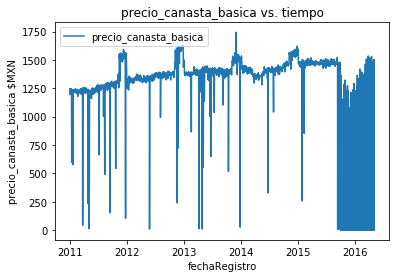

In [200]:
y_ans_val = [val.precio_canasta_basica for val in df_2c_p2.select('precio_canasta_basica').collect()]
x_ts = [val.fechaRegistro  for val in df_2c_p2.select('fechaRegistro').collect()]

plt.plot(x_ts, y_ans_val)

plt.ylabel('precio_canasta_basica $MXN')
plt.xlabel('fechaRegistro')
plt.title('precio_canasta_basica vs. tiempo')
plt.legend(['precio_canasta_basica'], loc='upper left')

plt.show()

Hay un patrón estacional donde se ve claramente que hay un incremento en la canasta básica en diciembre. El patrón estacional indica que la canasta básica en México ha ido incrementando en su precio de 2011 hasta finales del 2015. Luego a finales de 2015 bajó para despues volver a subir.  como la ultima fecha registrada es en 2016-04-29 17:47:2, entonces no se ve el incrementode diciembre para el 2016.

### d. ¿Cuál es el estado más caro y en qué mes?

In [175]:
df_2d = df.filter(f.col("producto").isin(canasta_basica))

In [176]:
df_2d_p1 = df_2d.groupby("estado", "producto").agg(f.avg("precio").alias("precios"))

In [177]:
df_2d_p2 = df_2d_p1.groupby("estado").agg(f.sum("precios").alias("precio_canasta_basica"), f.count("*").alias("#Productos_de_Canasta_Basica_en_estado"))

In [178]:
df_2d_p2.sort("precio_canasta_basica", ascending = False).show(truncate = False)

+--------------------+---------------------+--------------------------------------+
|estado              |precio_canasta_basica|#Productos_de_Canasta_Basica_en_estado|
+--------------------+---------------------+--------------------------------------+
|BAJA CALIFORNIA     |1798.630646273868    |48                                    |
|DURANGO             |1783.9164888438468   |49                                    |
|COLIMA              |1712.7976289824123   |49                                    |
|SINALOA             |1712.1481342051377   |49                                    |
|DISTRITO FEDERAL    |1684.9309186805956   |49                                    |
|ZACATECAS           |1684.4312326444988   |49                                    |
|COAHUILA DE ZARAGOZA|1682.7780480483543   |48                                    |
|BAJA CALIFORNIA SUR |1680.8668210166315   |48                                    |
|YUCATÁN             |1665.1219255149695   |49                              

A como podemos ver arriba el estado más caro es Baja California lo cual es consecuente con nuestro hayazgo que la ciudad más cara es Mexicali porque Mexicali precisamente se encuentra en Baja California.

In [179]:
df_2d = df_2d.withColumn('mes', f.month('fechaRegistro'))

In [180]:
df_2d_p2 = df_2d.filter(f.col("estado") == 'BAJA CALIFORNIA')

In [181]:
df_2d_p2f = df_2d_p2.groupby("mes", "producto").agg(f.avg("precio").alias("precios"))

In [182]:
df_2d_p2f2 = df_2d_p2f.groupby("mes").agg(f.sum("precios").alias("precio_canasta_basica"), f.count("*").alias("#Productos_de_Canasta_Basica_en_mes"))

In [183]:
df_2d_p2f2.sort("precio_canasta_basica", ascending = False).show(truncate = False)

+---+---------------------+-----------------------------------+
|mes|precio_canasta_basica|#Productos_de_Canasta_Basica_en_mes|
+---+---------------------+-----------------------------------+
|12 |1816.9796409031076   |48                                 |
|11 |1609.0574968019068   |47                                 |
|1  |1528.58494117274     |46                                 |
|2  |1528.521519278823    |46                                 |
|3  |1522.4804600877562   |46                                 |
|4  |1520.72767373831     |46                                 |
|5  |1515.7272519689127   |46                                 |
|10 |1505.2750970081413   |46                                 |
|9  |1492.9235468973782   |46                                 |
|8  |1490.6694202105868   |46                                 |
|6  |1482.2951727815816   |46                                 |
|7  |1480.6614183435825   |46                                 |
+---+---------------------+-------------

A como podemos ver con la columna del mes, el mes más caro en Baja California es el mes 12 el cual es diciembre.

### e. ¿Cuáles son los principales riesgos de hacer análisis de series de tiempo con estos datos?


Los principales reiesgos de hacer un analisis de tiempo con estos datos es que estan disponibles el mismo numero de productos de la canasta básica durante cada intervalo de tiempo en la base de datos. La frecuancia de los datos no es horaria entonces habría que hacer que toda la serie de tiempo tenga la misma frecuencia y ajustar los precios de manera apropriada. También no se esta tomando en cuenta un factor de inflación regional ni temporal lo cual cambiaría el precio de esta canasta básica.

### 3. Visualización a. Genera un mapa que nos permita identificar la oferta de categorías en la zona metropolitana de León Guanajuato y el nivel de precios en cada una de ellas. Se darán puntos extra si el mapa es interactivo

La visualización se encuentra en un pdf en este folder llamado:

In [202]:
df_3a = df.groupby("estado","municipio").agg(f.count("*").alias("cantidad"))

In [203]:
df_3a1 = df_3a.filter(f.col("estado") == "GUANAJUATO")

In [204]:
df_3a1.show(50, truncate = False)

+----------+----------------------------------------+--------+
|estado    |municipio                               |cantidad|
+----------+----------------------------------------+--------+
|GUANAJUATO|LEÓN                                    |729987  |
|GUANAJUATO|LEON                                    |1908469 |
+----------+----------------------------------------+--------+



Arriba estan los municipio del estado de Guanajuato. Como son el mismo municipio voy a hacer que tengan el mismo nombre

In [205]:
df3a2 = df.withColumn("municipio", when(df.municipio == "LEÓN","LEON"))

Vamos a utilizar las siguientes columnas para los datos

In [206]:
df_Leon = df3a2.filter(f.col("municipio") == "LEON").select("estado", "municipio", "categoria", "precio", "latitud", "longitud")

In [208]:
df_Leon.show()

+----------+---------+--------------------+------+---------+-----------+
|    estado|municipio|           categoria|precio|  latitud|   longitud|
+----------+---------+--------------------+------+---------+-----------+
|GUANAJUATO|     LEON|TORTILLAS Y DERIV...|  10.0|21.141389|-101.687397|
|GUANAJUATO|     LEON|TORTILLAS Y DERIV...|  23.0|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN|   1.5|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN|  28.0|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN| 17.43|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN| 31.58|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN| 29.65|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN|  24.7|21.141389|-101.687397|
|GUANAJUATO|     LEON|                 PAN|  12.9|21.141389|-101.687397|
|GUANAJUATO|     LEON|         CIGARRILLOS|  16.0|21.141389|-101.687397|
|GUANAJUATO|     LEON|GALLETAS PASTAS Y...|  13.9|2

In [209]:
df_Leon.count()

729987

In [211]:
df_Leon.toPandas().to_csv('leon_guanajuato.csv')

Dentro de este folder se encuentra el mapa interactivo generado en Tableau y su PDF homologo. LLamados Guanajuato_visualizacion.twb y Guanajuato_visualizacion.pdf respectivamente.

In [ ]:
# To kill the Spark application, use the `stop()` method
spark.stop()